![](https://gazete.firat.edu.tr/wp-content/uploads/2021/03/netflix-696x392.png)

## **Netflix Filmleri ve TV Programları Veri Seti**

**Açıklama:** Bu veri seti, Netflix'te bulunan filmler ve TV programları hakkında bilgiler içerir; başlık, yönetmen, oyuncu kadrosu, ülke, eklenme tarihi, yayın yılı, derecelendirme, süre, listelenen türler ve açıklama gibi bilgiler verir.

**Format:** Veri seti CSV dosyası olarak bulunuyor.

**Sütunlar:** Veri seti aşağıdaki sütunları içerir:
   1. `type`: İçeriğin bir film mi yoksa bir TV programı mı olduğunu belirtir.
   2. `title`: Filmin veya TV programının başlığı.
   3. `director`: Filmin veya TV programının yönetmen(leri).
   4. `cast`: Filmin veya TV programının oyuncu kadrosu.
   5. `country`: Filmin veya TV programının üretildiği ülke.
   6. `date_added`: Filmin veya TV programının Netflix'e eklendiği tarih.
   7. `release_year`: Filmin veya TV programının yayınlandığı yıl.
   8. `rating`: Filmin veya TV programının içerik derecelendirmesi.
   9. `duration`: Filmin veya TV programının süresi.
   10. `listed_in`: Filmin veya TV programının ait olduğu türler veya kategoriler.
   11. `description`: Filmin veya TV programının kısa açıklaması.

**Boyut:** Veri seti 8807 satır ve 12 sütun içerir.

**Kullanım:** Veri seti, Netflix'teki filmler ve TV programlarıyla ilgili keşifsel veri analizi, trend analizi, içerik öneri sistemleri ve diğer analitik amaçlar için kullanılabilir.

## **1. Kütüphaneleri İçe Aktarma**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## **2. Veri Setini İçe Aktarma**

In [3]:
df = pd.read_csv("netflix_titles.csv")

In [4]:
# veri setinin ilk beş satırı
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# veri setinin satır ve sütun sayısı
df.shape

(8807, 12)

#### **Sütunların Veri Tipi**

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### **Sütunların İsimleri**

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### **Veri Seti Hakkında Bilgi**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## **3. Eksik Değerleri Kontrol Etme ve Temizleme**

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

* Verileri incelediğimizde "director", "cast" ve "country" sütunlarında bol miktarda eksik veri olduğunu görüyoruz. 

In [11]:
df.isnull().sum().sum()

4307

* Sütunlardaki eksik değerleri "unknown" ile değiştirelim.

In [12]:
df.director.fillna(value="unknown", inplace=True)

In [13]:
df.cast.fillna(value="unknown", inplace=True)

In [14]:
df.country.fillna(value="unknown", inplace =True)

* Kalan birkaç eksik değer içeren satırı silelim.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* "show_id" sütununun gereksiz olduğunu düşünüyorum. O yüzden kaldırıcam.

In [17]:
df.drop(columns="show_id", inplace=True)

### **Veri Setindeki Sütunları Düzenleyelim**

In [18]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### **İlk olarak "date_added" sütunundaki tarihleri başka bir sütunda ay ve yıl olarak ayırmak istiyorum**

In [19]:
df["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8790, dtype: object

* Sütundaki değerleri datetime objesine dönüştürücem. Bazı verilerin başında boşluk olduğunu biliyorum. Bunları düzeltelim.

In [20]:
has_whitespaces = df["date_added"].str.startswith(" ")
indexes_with_whitespace = df[has_whitespaces].index

print("Boşluk içeren satırların indeksleri:")
print(indexes_with_whitespace)

Boşluk içeren satırların indeksleri:
Index([6079, 6177, 6213, 6279, 6304, 6318, 6357, 6361, 6368, 6393, 6451, 6456,
       6457, 6460, 6519, 6549, 6560, 6603, 6671, 6678, 6742, 6763, 6766, 6803,
       6822, 6868, 6871, 6885, 6890, 6894, 6922, 6935, 6941, 6955, 6969, 6970,
       7029, 7148, 7217, 7287, 7307, 7331, 7342, 7368, 7409, 7457, 7521, 7529,
       7574, 7576, 7586, 7628, 7646, 7679, 7705, 7709, 7721, 7729, 7806, 7850,
       7896, 7906, 7953, 7982, 8022, 8064, 8070, 8147, 8174, 8189, 8193, 8257,
       8271, 8311, 8315, 8357, 8378, 8422, 8423, 8424, 8442, 8510, 8518, 8539,
       8557, 8684, 8712, 8755],
      dtype='int64')


In [21]:
df["date_added"] = df["date_added"].str.strip()

* Sütundaki verileri datetime objesine dönüştürüp yıl ve ay olarak ayırıp yeni sütunlar oluşturalım.

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [23]:
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [24]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [25]:
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9


* "duration" sütununda türü "TV Show" olan içerikler sezon sayısı olarak gösterilmiş. "season_count" adlı yeni bir sütun oluşturup sezonları buraya ekleyelim.

In [26]:
df['season_count'] = df['duration'].apply(lambda x: x.split()[0] if 'Season' in x else '')

In [27]:
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [28]:
# df['season_count'] = df.apply(lambda x: x['duration'].split(" ")[0] if "Season" in x['duration'] else np.nan, axis=1)
# df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,


In [29]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2


## **Sorular**

### **1. Yıllar İçinde Netflix'e Eklenen Film ve TV Show Sayısı Kaçtır?**

In [30]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [31]:
df["type"].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

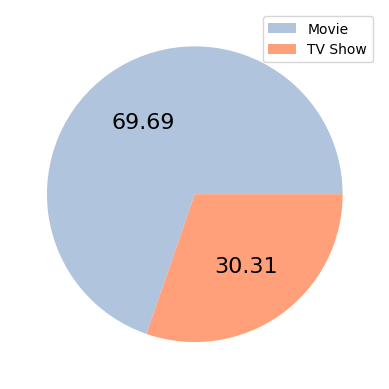

In [32]:
# İçerik türlerinin birbirine oranını görselleştirelim.
plt.pie(df.type.value_counts(), 
        labels = df.type.value_counts().index, 
        labeldistance = None, autopct="%.2f", 
        textprops = {'fontsize': 16,}, 
        colors = ['lightsteelblue','lightsalmon' ] )
plt.legend()
plt.show()

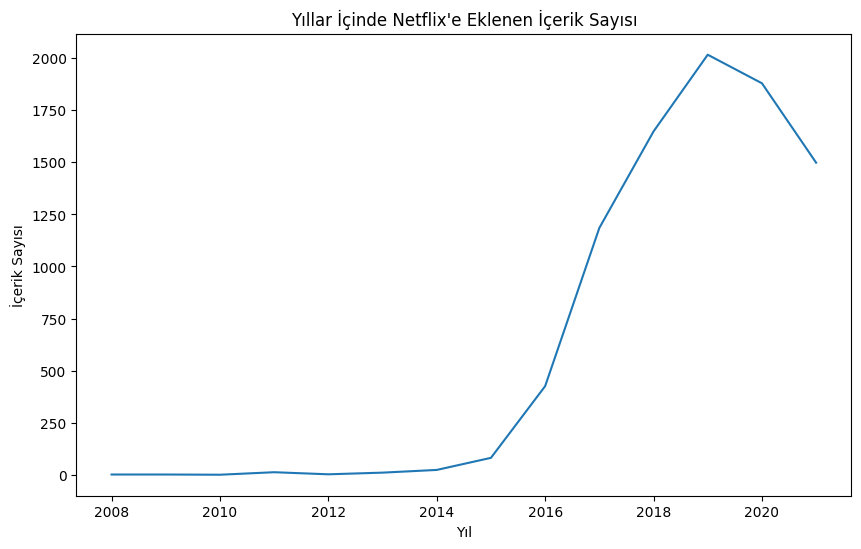

In [33]:
title_counts = df.groupby('year_added')['title'].count()

plt.figure(figsize=(10, 6))
title_counts.plot(kind='line')
plt.title("Yıllar İçinde Netflix'e Eklenen İçerik Sayısı")
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()


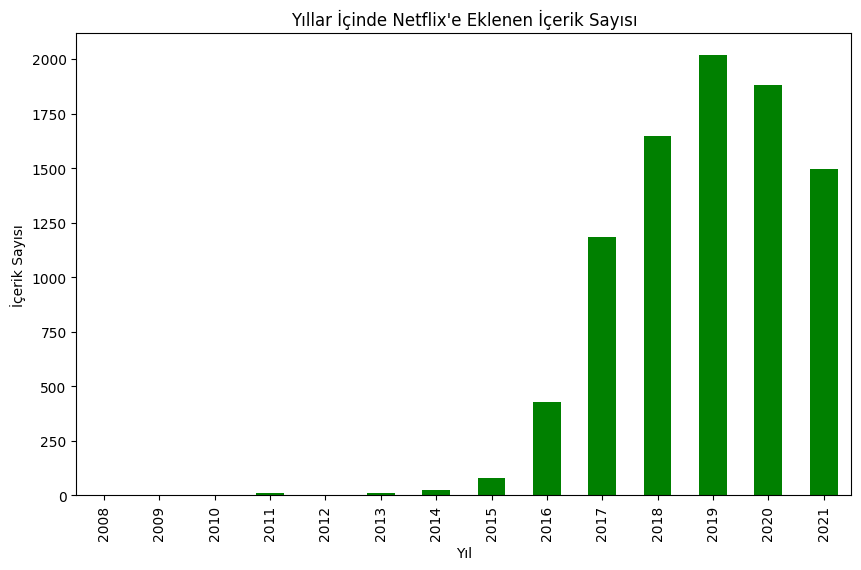

In [34]:
plt.figure(figsize=(10, 6))
title_counts.plot(kind='bar', color='green')
plt.title("Yıllar İçinde Netflix'e Eklenen İçerik Sayısı")
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()

In [35]:
title_counts

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: title, dtype: int64

In [36]:
# TV Show ve Movie'ye göre verilerin ayrılması
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Plotly Express kullanarak grafik oluşturma
fig = px.histogram(df, x="year_added", color="type", barmode="group", title="Content added over the years")

# Grafik gösterimi
fig.show()

In [37]:
# TV Show ve Movie'ye göre verilerin ayrılması
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Yıllara göre gruplanmış sayıları alma
vc1 = d1["year_added"].value_counts().reset_index()
vc1 = vc1.rename(columns={"year_added": "year_added", "index": "count_tv_shows"}) # "count" yerine "count_tv_shows" adını kullan

vc2 = d2["year_added"].value_counts().reset_index()
vc2 = vc2.rename(columns={"year_added": "year_added", "index": "count_movies"}) # "count" yerine "count_movies" adını kullan

# Plotly Express kullanarak çizgi grafiği oluşturma
fig = px.line(vc1, x="year_added", y="count", title="Content added over the years (TV Shows)",markers=True)
fig.add_scatter(x=vc2["year_added"], y=vc2["count"], mode="lines", name="Movies", line=dict(color="green"))

# Grafik gösterimi
fig.show()

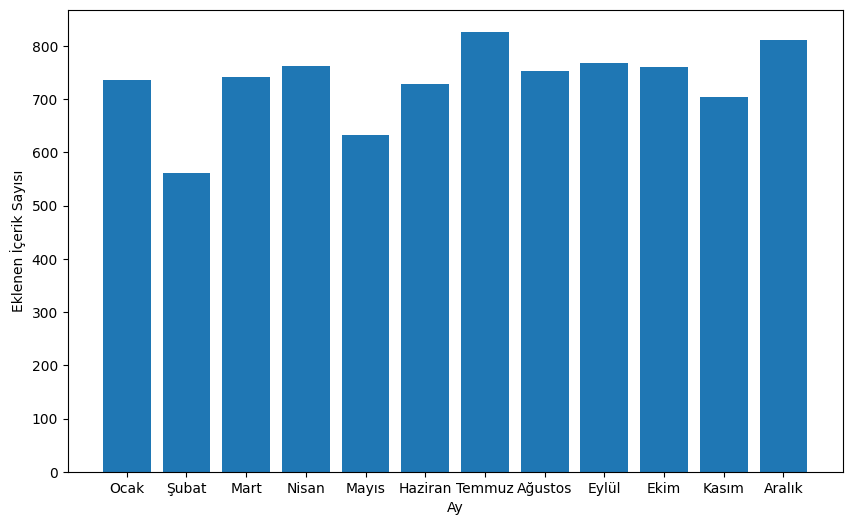

In [38]:
month_count = df["month_added"].value_counts().reset_index()
month_count = month_count.sort_values(by="month_added")  # Ayları sıralama
months = ["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"]

plt.figure(figsize=(10,6))
plt.bar(month_count["month_added"], month_count["count"])
plt.xticks(month_count["month_added"], months)  # X eksenindeki etiketleri ay isimleriyle değiştirme
plt.xlabel("Ay")
plt.ylabel("Eklenen İçerik Sayısı")
plt.show()


---

### **Analiz Raporu: İçerik Eklenmesi ve Trendlerin İncelenmesi**

**1. Genel Trendler:**
Veri setimizi incelediğimizde, içerik eklenme sayısının 2019 yılına kadar sürekli bir artış gösterdiğini tespit ettik. Ancak, 2019'dan itibaren bir düşüş eğilimi gözlemledik. Bu düşüşün ardındaki nedenleri anlamak, platformun gelecekteki içerik stratejisini belirlemede önemli olabilir.

**2. Film ve TV Show Karşılaştırması:**
İçerik türlerine baktığımızda, her yıl eklenen film sayısının TV Show'larına göre daha fazla olduğunu gözlemledik. Bu durum, platformun öncelikli olarak filmlere odaklanmış olabileceğini veya film türündeki içeriklerin daha hızlı üretildiğini düşündürmektedir. TV Show'ların daha uzun üretim süreçleri gerektirebileceğini ve bu nedenle daha az sayıda eklenmiş olabileceğini düşünebiliriz.

**3. Mevsimsel Etkiler:**
Aylara göre içerik eklenmesini incelediğimizde, en yüksek içerik eklenen ayın Temmuz olduğunu gözlemledik. Bu durum, mevsimsel etkilerin içerik eklemesi üzerinde önemli bir rol oynayabileceğini düşündürmektedir. Yaz aylarında insanların daha fazla boş zamanı olabilir ve bu nedenle içerik tüketiminde bir artış görülebilir. Ayrıca, yaz aylarında çeşitli tatil dönemleri olduğunu ve bu dönemlerde insanların daha fazla eğlence arayışında olduğunu göz önünde bulundurabiliriz.

**4. Analiz Sonuçları ve Öneriler:**
- Trend Analizi: Platformun içerik eklemesi trendlerini daha yakından izlemek ve düşüş eğilimini tersine çevirmek için stratejik planlar geliştirmek önemlidir. Örneğin, içerik kalitesini artırmak, özgün içerikler üretmek veya kullanıcı geri bildirimlerine dayalı olarak içerik öneri algoritmalarını iyileştirmek gibi önlemler alınabilir.
- İçerik Türleri: Film ve TV Show'ları arasındaki dengenin gözden geçirilmesi ve TV Show üretim süreçlerinin optimize edilmesi, içerik çeşitliliğini artırabilir ve kullanıcı memnuniyetini artırabilir.
- Mevsimsel Etkiler: Mevsimsel faktörlerin içerik eklemesi üzerindeki etkilerini daha iyi anlamak ve bu dönemlere özel içerik stratejileri geliştirmek, platformun kullanıcılarına daha çekici hale gelebilir.

Bu çıkarımların üzerine giderek, platformun içerik stratejisini ve operasyonel süreçlerini daha da optimize etmek için daha detaylı analizler ve kullanıcı geri bildirimlerine dayalı stratejik planlamalar yapılabilir.

---



### **2. Netflix'e Eklenen İçeriklerin Coğrafi Dağılımı**

In [39]:
from plotly.offline import init_notebook_mode, iplot

country_codes = {'afghanistan': 'AFG',
'albania': 'ALB',
'algeria': 'DZA',
'american samoa': 'ASM',
'andorra': 'AND',
'angola': 'AGO',
'anguilla': 'AIA',
'antigua and barbuda': 'ATG',
'argentina': 'ARG',
'armenia': 'ARM',
'aruba': 'ABW',
'australia': 'AUS',
'austria': 'AUT',
'azerbaijan': 'AZE',
'bahamas': 'BHM',
'bahrain': 'BHR',
'bangladesh': 'BGD',
'barbados': 'BRB',
'belarus': 'BLR',
'belgium': 'BEL',
'belize': 'BLZ',
'benin': 'BEN',
'bermuda': 'BMU',
'bhutan': 'BTN',
'bolivia': 'BOL',
'bosnia and herzegovina': 'BIH',
'botswana': 'BWA',
'brazil': 'BRA',
'british virgin islands': 'VGB',
'brunei': 'BRN',
'bulgaria': 'BGR',
'burkina faso': 'BFA',
'burma': 'MMR',
'burundi': 'BDI',
'cabo verde': 'CPV',
'cambodia': 'KHM',
'cameroon': 'CMR',
'canada': 'CAN',
'cayman islands': 'CYM',
'central african republic': 'CAF',
'chad': 'TCD',
'chile': 'CHL',
'china': 'CHN',
'colombia': 'COL',
'comoros': 'COM',
'congo democratic': 'COD',
'Congo republic': 'COG',
'cook islands': 'COK',
'costa rica': 'CRI',
"cote d'ivoire": 'CIV',
'croatia': 'HRV',
'cuba': 'CUB',
'curacao': 'CUW',
'cyprus': 'CYP',
'czech republic': 'CZE',
'denmark': 'DNK',
'djibouti': 'DJI',
'dominica': 'DMA',
'dominican republic': 'DOM',
'ecuador': 'ECU',
'egypt': 'EGY',
'el salvador': 'SLV',
'equatorial guinea': 'GNQ',
'eritrea': 'ERI',
'estonia': 'EST',
'ethiopia': 'ETH',
'falkland islands': 'FLK',
'faroe islands': 'FRO',
'fiji': 'FJI',
'finland': 'FIN',
'france': 'FRA',
'french polynesia': 'PYF',
'gabon': 'GAB',
'gambia, the': 'GMB',
'georgia': 'GEO',
'germany': 'DEU',
'ghana': 'GHA',
'gibraltar': 'GIB',
'greece': 'GRC',
'greenland': 'GRL',
'grenada': 'GRD',
'guam': 'GUM',
'guatemala': 'GTM',
'guernsey': 'GGY',
'guinea-bissau': 'GNB',
'guinea': 'GIN',
'guyana': 'GUY',
'haiti': 'HTI',
'honduras': 'HND',
'hong kong': 'HKG',
'hungary': 'HUN',
'iceland': 'ISL',
'india': 'IND',
'indonesia': 'IDN',
'iran': 'IRN',
'iraq': 'IRQ',
'ireland': 'IRL',
'isle of man': 'IMN',
'israel': 'ISR',
'italy': 'ITA',
'jamaica': 'JAM',
'japan': 'JPN',
'jersey': 'JEY',
'jordan': 'JOR',
'kazakhstan': 'KAZ',
'kenya': 'KEN',
'kiribati': 'KIR',
'north korea': 'PRK',
'south korea': 'KOR',
'kosovo': 'KSV',
'kuwait': 'KWT',
'kyrgyzstan': 'KGZ',
'laos': 'LAO',
'latvia': 'LVA',
'lebanon': 'LBN',
'lesotho': 'LSO',
'liberia': 'LBR',
'libya': 'LBY',
'liechtenstein': 'LIE',
'lithuania': 'LTU',
'luxembourg': 'LUX',
'macau': 'MAC',
'macedonia': 'MKD',
'madagascar': 'MDG',
'malawi': 'MWI',
'malaysia': 'MYS',
'maldives': 'MDV',
'mali': 'MLI',
'malta': 'MLT',
'marshall islands': 'MHL',
'mauritania': 'MRT',
'mauritius': 'MUS',
'mexico': 'MEX',
'micronesia': 'FSM',
'moldova': 'MDA',
'monaco': 'MCO',
'mongolia': 'MNG',
'montenegro': 'MNE',
'morocco': 'MAR',
'mozambique': 'MOZ',
'namibia': 'NAM',
'nepal': 'NPL',
'netherlands': 'NLD',
'new caledonia': 'NCL',
'new zealand': 'NZL',
'nicaragua': 'NIC',
'nigeria': 'NGA',
'niger': 'NER',
'niue': 'NIU',
'northern mariana islands': 'MNP',
'norway': 'NOR',
'oman': 'OMN',
'pakistan': 'PAK',
'palau': 'PLW',
'panama': 'PAN',
'papua new guinea': 'PNG',
'paraguay': 'PRY',
'peru': 'PER',
'philippines': 'PHL',
'poland': 'POL',
'portugal': 'PRT',
'puerto rico': 'PRI',
'qatar': 'QAT',
'romania': 'ROU',
'russia': 'RUS',
'rwanda': 'RWA',
'saint kitts and nevis': 'KNA',
'saint lucia': 'LCA',
'saint martin': 'MAF',
'saint pierre and miquelon': 'SPM',
'saint vincent and the grenadines': 'VCT',
'samoa': 'WSM',
'san marino': 'SMR',
'sao tome and principe': 'STP',
'saudi arabia': 'SAU',
'senegal': 'SEN',
'serbia': 'SRB',
'seychelles': 'SYC',
'sierra leone': 'SLE',
'singapore': 'SGP',
'sint maarten': 'SXM',
'slovakia': 'SVK',
'slovenia': 'SVN',
'solomon islands': 'SLB',
'somalia': 'SOM',
'south africa': 'ZAF',
'south sudan': 'SSD',
'spain': 'ESP',
'sri lanka': 'LKA',
'sudan': 'SDN',
'suriname': 'SUR',
'swaziland': 'SWZ',
'sweden': 'SWE',
'switzerland': 'CHE',
'syria': 'SYR',
'taiwan': 'TWN',
'tajikistan': 'TJK',
'tanzania': 'TZA',
'thailand': 'THA',
'timor-leste': 'TLS',
'togo': 'TGO',
'tonga': 'TON',
'trinidad and tobago': 'TTO',
'tunisia': 'TUN',
'turkey': 'TUR',
'turkmenistan': 'TKM',
'tuvalu': 'TUV',
'uganda': 'UGA',
'ukraine': 'UKR',
'united arab emirates': 'ARE',
'united kingdom': 'GBR',
'united states': 'USA',
'uruguay': 'URY',
'uzbekistan': 'UZB',
'vanuatu': 'VUT',
'venezuela': 'VEN',
'vietnam': 'VNM',
'virgin islands': 'VGB',
'west bank': 'WBG',
'yemen': 'YEM',
'zambia': 'ZMB',
'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
        ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="En Çok İçeriğe Sahip Ülkeler", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

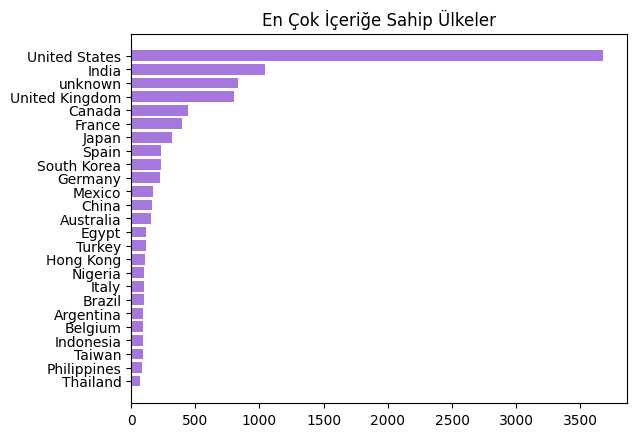

In [40]:
plt.barh(y=labels, width=values, color="#a678de", height=0.8)
plt.title("En Çok İçeriğe Sahip Ülkeler")
plt.show()


---

#### **Analiz Sonucu: Netflix'e Eklenen İçeriklerin Coğrafi Dağılımı**

Netflix'e eklenen içeriklerin coğrafi dağılımını incelediğimizde, en çok içeriğin aşağıdaki ülkelerden geldiğini gördük:

1. **United States:** Amerika Birleşik Devletleri, Netflix kütüphanesindeki içeriklerin büyük bir çoğunluğunu oluşturuyor. Bu durum, Netflix'in merkezi Amerika Birleşik Devletleri'nde bulunması ve burada yapılan içerik üretiminin etkili olmasından kaynaklanabilir.

2. **United Kingdom:** Birleşik Krallık, Netflix'e eklenen içeriklerde önemli bir paya sahiptir. Bu, Birleşik Krallık'ın televizyon ve film endüstrisinin önemli bir oyuncusu olmasından kaynaklanabilir.

3. **India:** Hindistan, Netflix'e eklenen içeriklerin artan bir şekilde katkıda bulunan önemli bir ülkedir. Hindistan'ın zengin sinema endüstrisi ve çeşitli kültürel içerikleri, Netflix'in Hindistan pazarına odaklanmasını sağlamış olabilir.

Bu ülkelerin yanı sıra, diğer ülkeler de Netflix'in içeriklerine katkıda bulunmaktadır. Özellikle, Asya Pasifik bölgesindeki ülkeler (örneğin, Güney Kore, Japonya, Çin, Filipinler ve Tayvan) ve Latin Amerika ülkeleri (örneğin, Brezilya, Arjantin ve Meksika), Netflix'in küresel çapta çeşitlilik sağlama hedefine katkıda bulunmaktadır.

Bu analiz, Netflix'in küresel çapta içerik üretme ve dağıtma stratejisinin bir yansıması olarak görülebilir. Farklı ülkelerden gelen içerikler, Netflix'in geniş kitlelere hitap etme ve küresel pazarda rekabet etme kabiliyetini artırırken, aynı zamanda kültürel çeşitlilik ve farklılık sunma potansiyeline sahiptir.

--- 

### **3. Film Süresinin Dağılımı ve Etkileri**

In [41]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Film Süresinin Dağılımı')
fig.show()


c:\Users\Yusuf Altuntaş\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



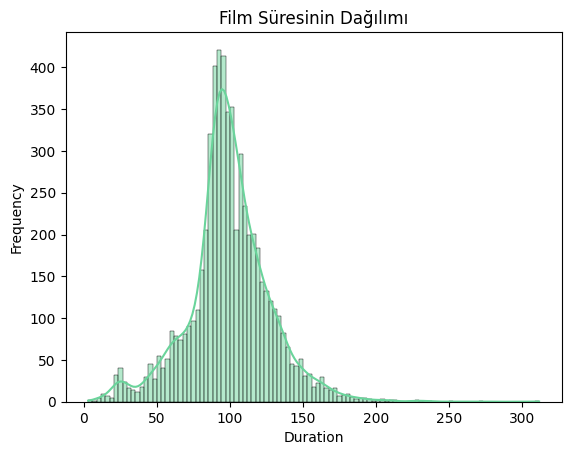

In [42]:
x1 = d2['duration'].fillna(0.0).astype(float)
sns.histplot(x=x1, kde=True, color="#6ad49b")

# Grafiği gösterme
plt.title('Film Süresinin Dağılımı')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


---

#### **Analiz Sonucu: Film Süresinin Dağılımı ve Etkileri**

Yaptığım analiz sonucunda, film süresinin dağılımının 90 dakikaya kadar artış gösterdiğini ve 90 dakikada en yüksek seviyede olduğunu, ancak sonrasında 100 dakikadan itibaren bir düşüş yaşandığını ortaya koymuştur.

1. **Artışın Analizi:**
Film süresinin 90 dakikaya kadar artış göstermesi, kısa ve orta metrajlı filmlerin popülerliğinde bir artış olabileceğini işaret edebilir. İzleyicilerin kısa ve yoğun içeriklere olan ilgisinin artması veya çeşitli platformların kısa formatlı içeriklere yatırım yapması, bu artışın nedenlerinden biri olabilir. Ayrıca, 90 dakikaya kadar olan filmlerin daha kolay tüketilebilir olduğu ve izleyiciler tarafından tercih edildiği de düşünülebilir.

2. **Düşüşün Analizi:**
Film süresinin 100 dakikadan sonra düşüş göstermesi, uzun metrajlı filmlerin popülerliğinde bir azalma olabileceğini işaret edebilir. Uzun metrajlı filmlerin izleyici talebi üzerindeki etkisi azalmış olabilir veya izleyicilerin dikkat sürelerinin kısalması nedeniyle kısa ve yoğun içeriklere yönelmeleri, bu düşüşün nedenlerinden biri olabilir. Ayrıca, dijital platformlardaki içerik sunumu ve tüketim alışkanlıklarındaki değişiklikler de uzun metrajlı filmlerin popülerliğini etkileyebilir.

3. **Sonuçlar ve Öneriler:**
- İçerik Üretimi: İçerik sağlayıcılar, kısa ve orta metrajlı filmlere daha fazla yatırım yaparak izleyici talebini karşılayabilir ve popülerliği artırabilir.
- Pazarlama Stratejileri: Uzun metrajlı filmlerin izleyicilere daha çekici hale getirilmesi için etkili pazarlama stratejileri geliştirilebilir.
- İzleyici Geri Bildirimleri: İzleyicilerle iletişim halinde kalarak taleplerini ve tercihlerini belirlemek, içerik üreticileri için değerli bir yol olabilir.

Bu analiz sonuçları, film endüstrisindeki eğilimleri ve izleyici davranışlarını anlamak ve içerik stratejilerini belirlemek için değerli bir rehber sağlayabilir.

--- 

### **4. TV Show'ların Sezon Sayısı**

In [43]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2


In [44]:
df.loc[0, "season_count"]

''

In [45]:
seasons = df[df["season_count"] != ""]
seasons = seasons["season_count"].value_counts().reset_index()
seasons

,season_count,count
0,1,1791
1,2,421
2,3,198
3,4,94
4,5,64
5,6,33
6,7,23
7,8,17
8,9,9
9,10,6


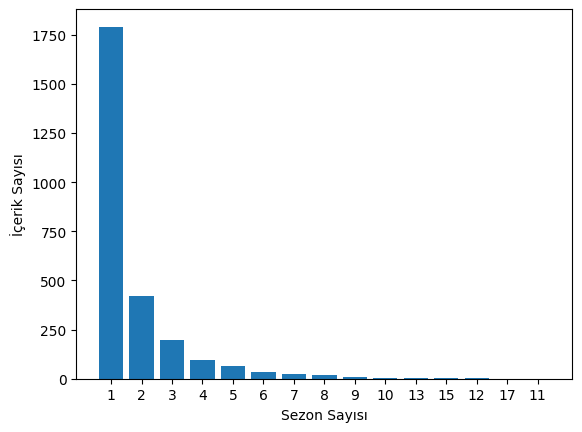

In [46]:
plt.bar(seasons["season_count"], seasons["count"])
plt.xlabel("Sezon Sayısı")
plt.ylabel("İçerik Sayısı")
plt.show()


---

#### **Analiz Raporu: Netflix TV Show'ların Sezon Sayısı ve İçerik Sayısı İlişkisi**

Bu analiz raporu, Netflix platformundaki TV Show'ların sezon sayısı ile içerik sayısı arasındaki ilişkiyi incelemekte ve elde edilen sonuçları sunmaktadır.

1. **Sezon Sayısı ve İçerik Sayısı İlişkisi:**
   - Yapılan analizde, TV Show'ların sezon sayısının artmasıyla içerik sayısının azaldığı gözlemlenmiştir. Bu durum, daha uzun soluklu TV Show'ların daha az sayıda olmasıyla ilişkilendirilebilir. İzleyicilerin, daha uzun süreli ve devamlılığı olan TV Show'lara olan ilgisinin azalması, içerik sayısının azalmasına yol açabilir.

2. **1 Sezonluk Programların Sıklığı:**
   - İncelenen verilere göre, 1 sezonluk program sayısının diğerlerine kıyasla anormal derecede fazla olduğu belirlenmiştir. Bu durum, Netflix platformunda birçok dizi projesinin ilk sezonundan sonra iptal edilmesi veya devam sezonlarının yapılmamasıyla ilişkilendirilebilir. Ayrıca, 1 sezonluk programların daha düşük bir maliyetle üretilebileceği ve riskin azaltılabileceği düşünülebilir.

3. **Öneriler ve Sonuçlar:**
   - **İzleyici Geri Bildirimi**: İzleyicilerin tercihlerini ve beklentilerini anlamak için düzenli geri bildirim almak önemlidir. Bu, içerik üreticilerinin daha doğru kararlar almasına yardımcı olabilir.
   - **Pazarlama ve Tanıtım Stratejileri:** Netflix, 1 sezonluk programlara odaklanmak yerine, daha uzun soluklu ve devam eden projelere odaklanarak platformlarında daha çeşitli ve tatmin edici bir içerik kütüphanesi sunabilir.

Bu analiz raporu, Netflix ve diğer içerik sağlayıcıları için içerik stratejilerini ve kararlarını belirlemede faydalı bir rehber sağlamaktadır.

---

### **5. Netflix İçerik Derecelendirmeleri Dağılımı**

In [58]:
overall_ratings_distribution = df['rating'].value_counts(normalize=True)

# Ratings distribution for movies and TV shows
movie_ratings_distribution = df[df['type'] == 'Movie']['rating'].value_counts(normalize=True)
tv_show_ratings_distribution = df[df['type'] == 'TV Show']['rating'].value_counts(normalize=True)

# Combine movie and TV show ratings into a single DataFrame
ratings_df = pd.DataFrame({
    'Rating': overall_ratings_distribution.index,
    'Overall': overall_ratings_distribution.values,
    'Movies': movie_ratings_distribution.reindex(overall_ratings_distribution.index).fillna(0).values,
    'TV Shows': tv_show_ratings_distribution.reindex(overall_ratings_distribution.index).fillna(0).values
})

# Melt the DataFrame for easier plotting
ratings_melted = ratings_df.melt(id_vars='Rating', var_name='Type', value_name='Percentage')

# Plotting using Plotly Express
fig = px.bar(ratings_melted, x='Rating', y='Percentage', color='Type', barmode='group',
            labels={'Percentage': 'Percentage of Total', 'Rating': 'Rating'},
            title='Distribution of Content Ratings on Netflix')
fig.show()

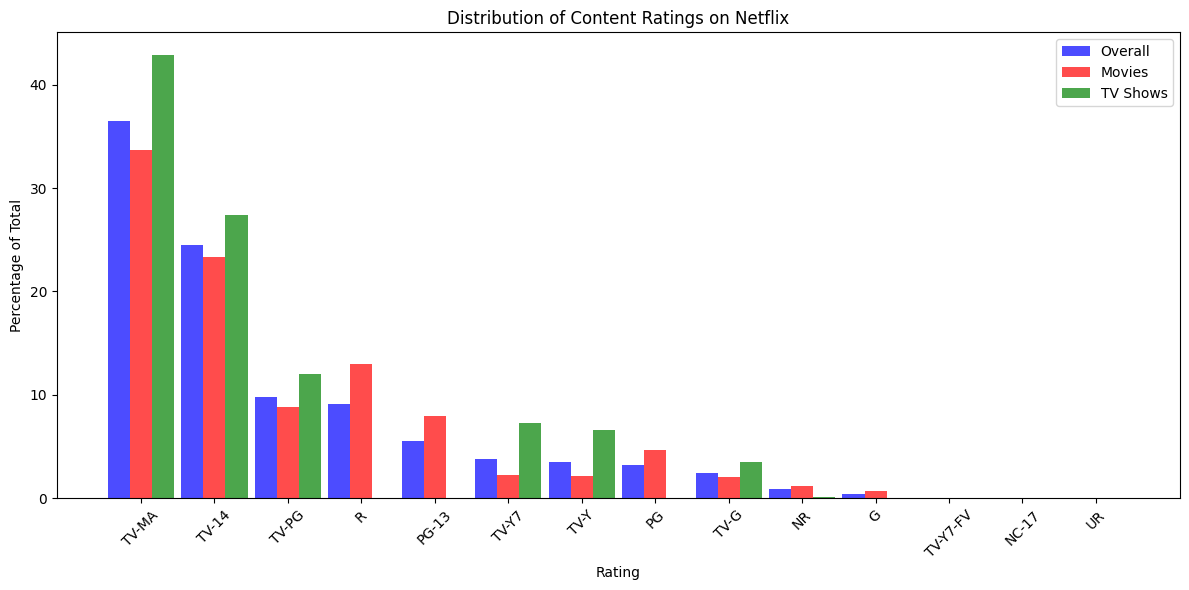

In [61]:

# Overall ratings distribution
overall_ratings_distribution = df['rating'].value_counts(normalize=True)
ratings = overall_ratings_distribution.index
overall_percentages = overall_ratings_distribution.values * 100

# Ratings distribution for movies
movie_ratings_distribution = df[df['type'] == 'Movie']['rating'].value_counts(normalize=True)
movie_percentages = movie_ratings_distribution.reindex(ratings).fillna(0).values * 100

# Ratings distribution for TV shows
tv_show_ratings_distribution = df[df['type'] == 'TV Show']['rating'].value_counts(normalize=True)
tv_show_percentages = tv_show_ratings_distribution.reindex(ratings).fillna(0).values * 100

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.3
index = range(len(ratings))

plt.bar(index, overall_percentages, bar_width, label='Overall', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], movie_percentages, bar_width, label='Movies', color='red', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], tv_show_percentages, bar_width, label='TV Shows', color='green', alpha=0.7)

plt.xlabel('Rating')
plt.ylabel('Percentage of Total')
plt.title('Distribution of Content Ratings on Netflix')
plt.xticks([i + bar_width for i in index], ratings, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


---

#### **Analiz Raporu: Netflix İçerik Derecelendirmeleri Dağılımı**

Bu analizde, Netflix veri setinde yer alan içeriklerin derecelendirmelerini inceledik. Derecelendirmelerin sıklığına göre büyükten küçüğe sıralanan en yaygın derecelendirmeler şunlardır:

1. TV-MA
2. TV-14
3. TV-PG
4. R
5. PG-13
6. TV-Y7
7. PG
8. TV-G
9. NR
10. G

Bu derecelendirmelerin dağılımı incelendiğinde çeşitli analiz sonuçları elde edilebilir:

- **Hedef Kitle Odaklı İçerikler**: En yaygın derecelendirmeler arasında TV-MA ve TV-14 gibi derecelendirmelerin bulunması, Netflix'in genellikle yetişkinlere veya genç yetişkinlere yönelik içerikler sunduğunu gösterebilir.

- **Çeşitlilik ve Kapsayıcılık**: Netflix, TV-PG ve TV-Y7 gibi daha geniş bir kitleye hitap eden içerikleri de sunmaktadır. Bu çeşitlilik, platformun farklı yaş gruplarına ve tercihlere sahip kullanıcıları memnun etmeyi amaçladığını gösterir.

- **Derecelendirme Stratejisi**: Netflix'in içerik sunumu ve derecelendirme stratejisi, en sık bulunan derecelendirmeleri dikkate almaktadır. Bu, platformun içerik kataloğunu ve stratejisini şekillendiren önemli bir faktördür.

Bu analiz sonuçları, Netflix'in içerik sunumu ve kullanıcı kitlesini anlamak için değerli bir içgörü sağlar. Platformun içerik stratejisini değerlendirirken, bu derecelendirmelerin önemini göz önünde bulundurmak önemlidir.

---

### **6. Netflix İçerik Türleri Dağılımı**

In [52]:
genre_counts = df["listed_in"].value_counts()
genre_counts.head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

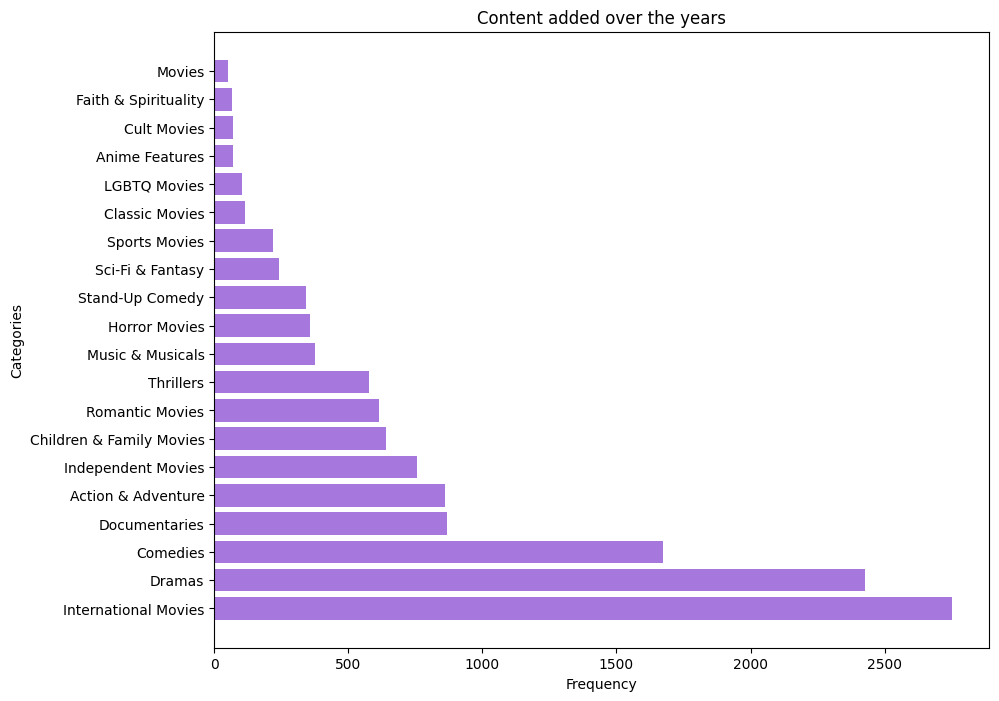

In [55]:
from collections import Counter

# 'listed_in' sütunundaki verilerin analizi
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

# Yatay çubuk grafik oluşturma
plt.figure(figsize=(10, 8))
plt.barh(labels, values, color="#a678de")
plt.xlabel('Frequency')
plt.ylabel('Categories')
plt.title('Content added over the years')
plt.gca().invert_yaxis()  # Ters y eksenini ayarlar
plt.show()


---

#### **Analiz Raporu: Netflix İçerik Türleri Dağılımı**

Bu analizde, Netflix veri setinde yer alan içeriklerin türlerini inceledik ve en sık bulunan türleri belirledik. En çok bulunan türler şunlardır:


* 1. International Movies
* 2. Dramas
* 3. Comedies
* 4. Documentaries
* 5. Action & Adventure
* 6. Independent Movies
* 7. Children & Family Movies
* 8. Romantic Movies
* 9. Thrillers
* 10. Music & Musicals
* 11. Horror Movies
* 12. Stand-Up Comedy
* 13. Sci-Fi & Fantasy
* 14. Sports Movies
* 15. Classic Movies
* 16. LGBTQ Movies
* 17. Anime Features
* 18. Cult Movies
* 19. Faith & Spirituality
* 20. Movies

Bu türlerin dağılımı incelendiğinde çeşitli analiz sonuçları elde edilebilir:

- **Çeşitlilik ve Kapsayıcılık**: Netflix'in içerik kataloğunda geniş bir tür çeşitliliği bulunmaktadır. Bu, farklı izleyici kitlesine hitap etmek ve çeşitli ilgi alanlarını kapsamak için platformun çeşitli içerikler sunduğunu gösterir.

- **İzleyici Tercihleri ve Trendler**: Belirli türlerin diğerlerinden daha yaygın olması, izleyici tercihlerini ve popüler içerik türlerini yansıtabilir. Örneğin, Comedies ve Dramas gibi genel türlerin sıkça bulunması, geniş bir izleyici kitlesi tarafından tercih edilen popüler türler olabilir.

- **Çeşitli Kültürel İfade Biçimleri**: Analiz sonuçları, farklı kültürel ve sanatsal ifade biçimlerinin Netflix platformunda geniş bir şekilde temsil edildiğini gösterir. Örneğin, Independent Movies ve International Movies gibi türler, kültürel çeşitliliği ve farklı sinema tarzlarını yansıtabilir.

Bu analiz sonuçları, Netflix'in içerik stratejisi ve izleyici kitlesinin ilgi alanları hakkında değerli bir içgörü sağlar. Platformun içerik kataloğunu yönlendirmek ve izleyici taleplerini karşılamak için bu tür analizlerin dikkate alınması önemlidir.

### **6. Film Oyuncuları Arasında En Yaygın Olan Kişiler**

In [74]:
def country_trace(country, flag="movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if _[0] != "unknown"]

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="")
    return trace

traces = []
titles = ["United States", "", "India", "", "United Kingdom", "", "Canada", "", "Spain", "", "Japan"]
valid_titles = [title for title in titles if title]  # Boş olmayan başlıkları seçin
for title in valid_titles:
    traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=3, subplot_titles=valid_titles)
for i, trace in enumerate(traces, start=1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1
    fig.add_trace(trace, row, col)

fig.update_layout(height=800, showlegend=False)
fig.show()

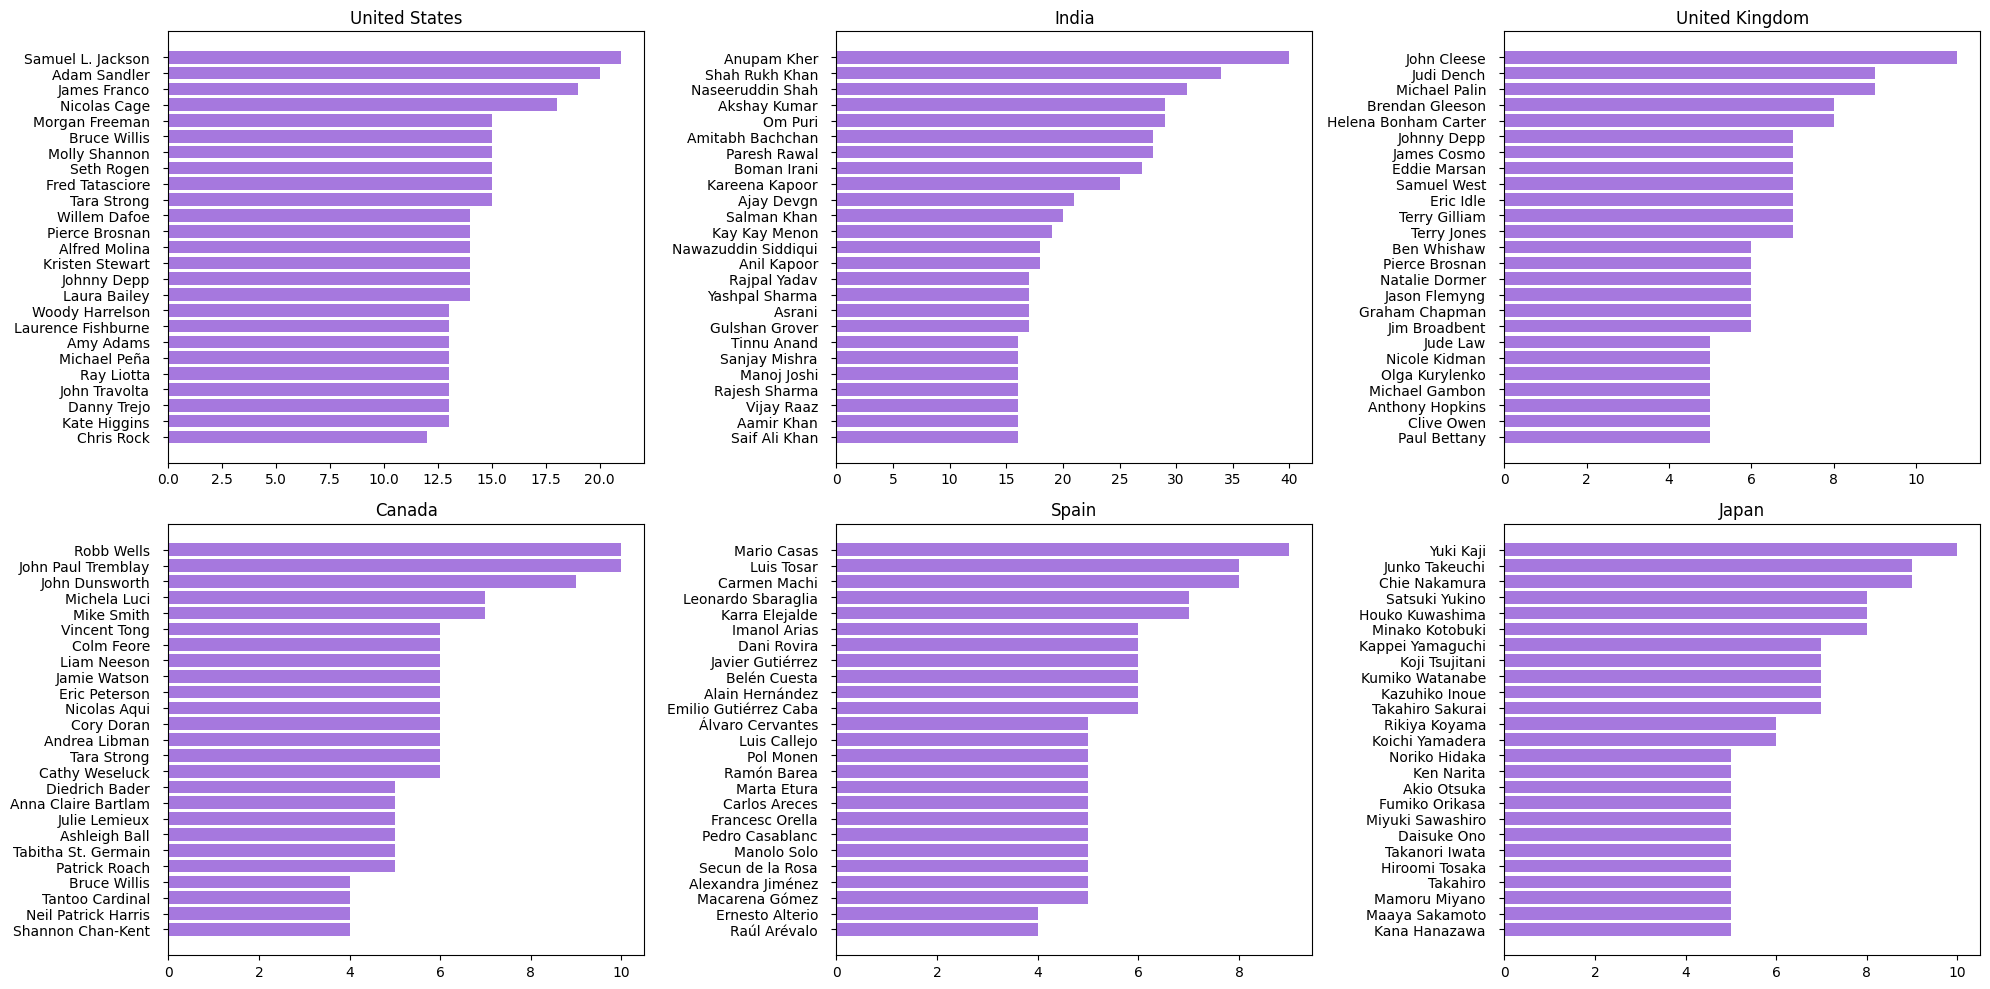

In [69]:
import matplotlib.pyplot as plt
from collections import Counter

def country_trace(country, flag="movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    # 'unknown' değerleri filtrele
    cast = [_ for _ in cast if _ != "unknown"]
    tags = Counter(cast).most_common(25)

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    return labels[::-1], values[::-1]

titles = ["United States", "", "India", "", "United Kingdom", "", "Canada", "", "Spain", "", "Japan"]
valid_titles = [title for title in titles if title]  # Boş olmayan başlıkları seçin
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, title in enumerate(valid_titles):
    labels, values = country_trace(title)
    ax = axs[i // 3, i % 3]  # Alt grafik dizinini hesapla
    ax.barh(labels, values, color="#a678de")
    ax.set_title(title)

plt.tight_layout()
plt.show()


### **7. En Yaygın TV Show Oyuncuları**

In [76]:
traces = []
titles = ["United States","", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)

fig.update_layout(height=600, showlegend=False)
fig.show()

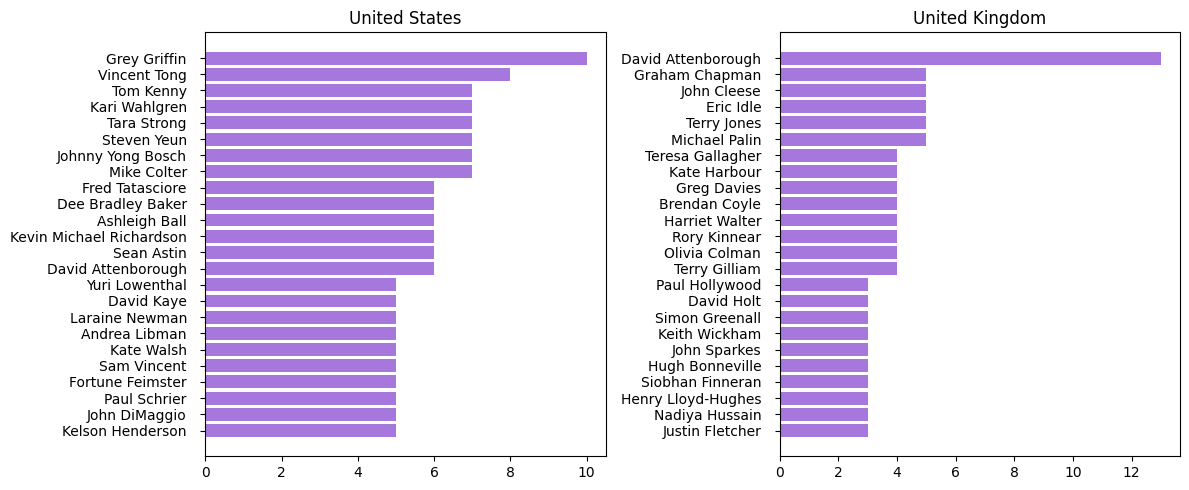

In [78]:
def country_trace(country, flag="movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if _[0] != "unknown"]

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    return labels[::-1], values[::-1]

traces = []
titles = ["United States", "United Kingdom"]
for title in titles:
    labels, values = country_trace(title, flag="tv_shows")
    traces.append((labels, values))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, (title, (labels, values)) in enumerate(zip(titles, traces)):
    axs[i].barh(labels, values, color="#a678de")
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

## **Proje Sahibi Hakkında**

* İsim: Yusuf Altuntaş
* Linked In: [LinkedIn](www.linkedin.com/in/yusuf-altuntaş-009a46178)
* Github: [Github](https://github.com/YusufAltuntas)
* Kaggle: [Kaggle](https://www.kaggle.com/yusufaltuntass)